# Big Mart Sales Prediction using Machine Learning with Python

## Step 1: Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Step 2: Load the Dataset

In [2]:
df = pd.read_csv('data/Train.csv')

#### Getting the first five rows

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Number of the data points and number of features.

In [4]:
df.shape

(8523, 12)

#### Get some statistical information about out dataset like min, mean, quartiles etc

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Getting some information about the dataset like data type etc.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Categorical Features:**
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

#### Find out null values if there are any

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# check how percent data is missing for each column
df.isnull().sum()*100/len(df)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

since missing values more in percentage that is >5% \
so we have to handle the missing values

In [9]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

### Handling the missing values in the data
There are multiple methods to fill missing values in the data
| Univariate Imputation | Bivariate Imputation |
| ----------- | ----------- |
| Mean Imputation      | Regression    |
| Median Imputation | KNN Imputation  |
|Mode Imputation|Machine Learning based Imputation|
|Constant value Imputation||
|Interpolation||


#### Univariate Imputation

In [10]:
mean_weight = df['Item_Weight'].mean()
median_weight = df['Item_Weight'].median()
print(mean_weight, median_weight)

12.857645184135976 12.6


In [11]:
# Filling missing values with mean and median
df['Item_Weight_mean'] = df['Item_Weight'].fillna(mean_weight)
df['Item_Weight_median'] = df['Item_Weight'].fillna(median_weight)

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [13]:
# lets check the variance of the column after and before Imputation
print('original weight variance: ', df['Item_Weight'].var())
print('mean imputation weight variance: ', df['Item_Weight_mean'].var())
print('original median weight variance: ', df['Item_Weight_median'].var())

original weight variance:  21.561688259836558
mean imputation weight variance:  17.86012173506058
original median weight variance:  17.869561454073647


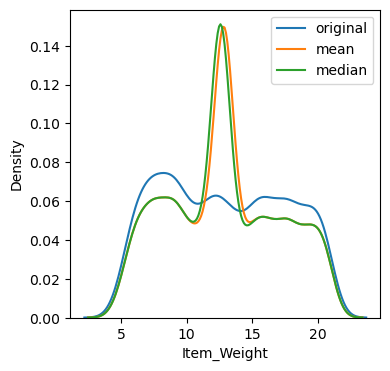

In [14]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df, x='Item_Weight', label= 'original')  
sns.kdeplot(data=df, x='Item_Weight_mean', label= 'mean')  
sns.kdeplot(data=df, x='Item_Weight_median', label= 'median')  
plt.legend()
plt.show()


we can see more values are clustered around mean and median and this is not desired.

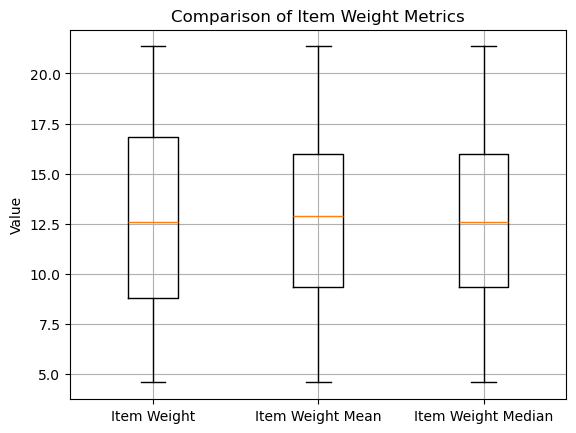

In [15]:
plt.boxplot([df[df['Item_Weight'].notna()]["Item_Weight"], df['Item_Weight_mean'], df['Item_Weight_median']], 
            tick_labels=['Item Weight', 'Item Weight Mean', 'Item Weight Median'])
plt.title('Comparison of Item Weight Metrics')
plt.grid()
plt.ylabel('Value')
plt.show()

we can see after mean and median imputation there is reduction in the data which is not desirable.\
so we are going to use the next imputation method which is `Interpolation`

In [16]:
df['Item_Weight_interpolate'] = df['Item_Weight'].interpolate(method='linear')

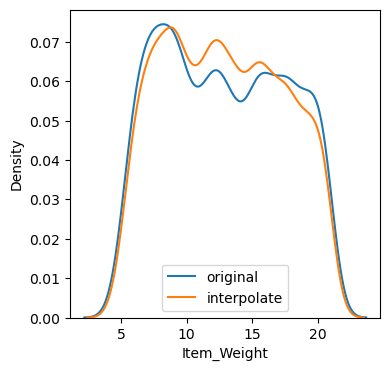

In [17]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df, x='Item_Weight', label= 'original')  
sns.kdeplot(data=df, x='Item_Weight_interpolate', label= 'interpolate')  
plt.legend()
plt.show()

we can see this imputer is better than mean and medain.

#### Bivariate/ Multivariate Imputation

In [18]:
from sklearn.impute import KNNImputer

In [19]:
knn = KNNImputer(n_neighbors=10, weights='distance')  
# Parameters:
#   n_neighbors: The number of nearest neighbors to use for imputation.

#   weights:    The weight assigned to each neighbor's contribution.
#                'distance': Neighbors are weighted by the inverse of their distance.
#                            Closer neighbors have a greater influence. This is often
#                            a good choice as closer neighbors are more likely to be
#                            similar.
#                'uniform': All neighbors are weighted equally.  This might be
#                           appropriate if you believe all neighbors are equally
#                           relevant.

In [20]:
df['knn_imputer'] = knn.fit_transform(df[['Item_Weight']])
# The double square brackets [[]] create a new DataFrame that contains only the 'Item_Weight' column.

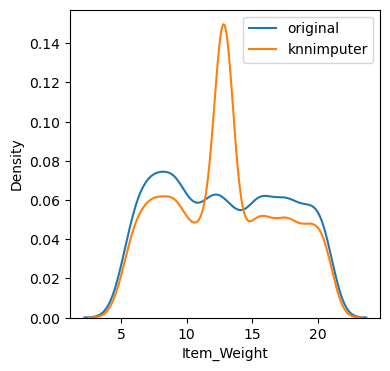

In [21]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df, x='Item_Weight', label= 'original')  
sns.kdeplot(data=df, x='knn_imputer', label= 'knnimputer')  
plt.legend()
plt.show()

so from all these methods, linear interpolation is best imputation method here.\
so we'll use the interpolate column by dropping other imputed columns.

In [22]:
df.drop(['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median', 'knn_imputer'], axis=1, inplace=True)

In [23]:
df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92


#### Outlet_Size

In [24]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [25]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

we are going to fill null values of Outlet_Size based on the mode of the Outlet_Type column (using groupby/ pivot table).

In [26]:
# Calculate the mode of 'Outlet_Size' for each 'Outlet_Type'
mode_outlet_size = df.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0])

In [27]:
mode_outlet_size

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [28]:
# Fill missing 'Outlet_Size' values using the calculated modes
df['Filled_Outlet_Size'] = df.apply(lambda row: mode_outlet_size[row['Outlet_Type']] if pd.isnull(row['Outlet_Size']) else row['Outlet_Size'], axis=1)

In [29]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Filled_Outlet_Size
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,Medium
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,Medium
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,Medium
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,Small
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,High


In [30]:
df.drop(['Outlet_Size'], axis=1, inplace=True)

In [31]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
Filled_Outlet_Size           0
dtype: int64

#### Item_Fat_Content

In [32]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

here, 
- Low Fat = LF, low fat
- Regular = reg
let us replace them into there one group.

In [33]:
x = lambda e : 'LF' if e == 'Low Fat' or e == 'low fat' or e == 'LF' else 'Reg'
df['Item_Fat_Content']= df['Item_Fat_Content'].apply(x)


In [34]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF     5517
Reg    3006
Name: count, dtype: int64

#### Item_Visibility

In [35]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.107274      2
0.074613      2
0.045166      2
           ... 
0.056783      1
0.046982      1
0.035186      1
0.145221      1
0.016827      1
Name: count, Length: 7880, dtype: int64

here, 0.0 are missing values, so lets handle them.
- first convert 0 to nan\
- then impute using the interpolate

In [37]:
df['Item_Visibility_linear'] = df['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [38]:
df['Item_Visibility_linear'].value_counts()

Item_Visibility_linear
0.076975    3
0.080969    2
0.096592    2
0.093308    2
0.076792    2
           ..
0.043792    1
0.040399    1
0.037006    1
0.091473    1
0.016047    1
Name: count, Length: 8405, dtype: int64

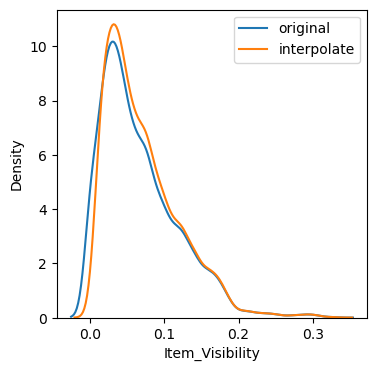

In [40]:
# lets check distribution after and before interpolation 
plt.figure(figsize=(4,4))
sns.kdeplot(data=df, x='Item_Visibility', label= 'original')  
sns.kdeplot(data=df, x='Item_Visibility_linear', label= 'interpolate')  
plt.legend()
plt.show()

In [42]:
# drop the Item_Visibility column 
df.drop(['Item_Visibility'], inplace=True, axis=1)

In [43]:
df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Filled_Outlet_Size,Item_Visibility_linear
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,9.30,Medium,0.016047
1,DRC01,Reg,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,5.92,Medium,0.019278


#### Item_Type 

In [45]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

#### Item_Identifier

In [46]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCF42     9
FDW26     9
FDX31     9
         ..
FDY43     1
FDO33     1
FDK57     1
FDQ60     1
FDN52     1
Name: count, Length: 1559, dtype: int64

here, only two characters has meaning that is 
* FDG33  -> Food
* NCF42  -> Non consumable
* DRC01  -> Drink

In [49]:
# lets slice the elements of this column
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[:2])

In [50]:
df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

#### Outlet_Establishment_Year

In [51]:
df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

lets check the age of Outlets i.e. from how many year particular outlet is present in the market.

In [53]:
import datetime as dt
current_year = dt.datetime.today().year

In [54]:
df['Outlet_age'] = df['Outlet_Establishment_Year'].apply(lambda x: current_year-x)

In [55]:
df['Outlet_age'] 

0       26
1       16
2       26
3       27
4       38
        ..
8518    38
8519    23
8520    21
8521    16
8522    28
Name: Outlet_age, Length: 8523, dtype: int64

In [57]:
df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

In [58]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Filled_Outlet_Size,Item_Visibility_linear,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Tier 1,Supermarket Type1,3735.1380,9.30,Medium,0.016047,26
1,DR,Reg,Soft Drinks,48.2692,OUT018,Tier 3,Supermarket Type2,443.4228,5.92,Medium,0.019278,16
2,FD,LF,Meat,141.6180,OUT049,Tier 1,Supermarket Type1,2097.2700,17.50,Medium,0.016760,26
3,FD,Reg,Fruits and Vegetables,182.0950,OUT010,Tier 3,Grocery Store,732.3800,19.20,Small,0.015755,27
4,NC,LF,Household,53.8614,OUT013,Tier 3,Supermarket Type1,994.7052,8.93,High,0.014751,38


#### Handling Categorical Columns
since ML model understands only numerical data.
we will use `OrdinalEncoder` not LabelEncoder( since it Encodes target labels with values between 0 and n_classes-1.)

In [66]:
cat_cols = df.columns[df.dtypes=='object']
cat_x = df[cat_cols]

In [67]:
cat_x.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Filled_Outlet_Size
0,FD,LF,Dairy,OUT049,Tier 1,Supermarket Type1,Medium
1,DR,Reg,Soft Drinks,OUT018,Tier 3,Supermarket Type2,Medium
2,FD,LF,Meat,OUT049,Tier 1,Supermarket Type1,Medium
3,FD,Reg,Fruits and Vegetables,OUT010,Tier 3,Grocery Store,Small
4,NC,LF,Household,OUT013,Tier 3,Supermarket Type1,High


In [81]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data_encoded = pd.DataFrame(enc.fit_transform(cat_x), columns=cat_cols)

In [84]:
# Print the categories
enc.categories_

[array(['DR', 'FD', 'NC'], dtype=object),
 array(['LF', 'Reg'], dtype=object),
 array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
        'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
        'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
        'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object),
 array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
        'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object),
 array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object),
 array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'], dtype=object),
 array(['High', 'Medium', 'Small'], dtype=object)]

In [83]:
data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Filled_Outlet_Size
0,1.0,0.0,4.0,9.0,0.0,1.0,1.0
1,0.0,1.0,14.0,3.0,2.0,2.0,1.0
2,1.0,0.0,10.0,9.0,0.0,1.0,1.0
3,1.0,1.0,6.0,0.0,2.0,0.0,2.0
4,2.0,0.0,9.0,1.0,2.0,1.0,0.0


In [100]:
# lets us Concatenate the numerical data and encoded one
num_cols = df.columns[df.dtypes!='object']
new_df = pd.concat([df[num_cols], data_encoded], axis=1)

In [110]:
new_df.head(5)

,Item_MRP,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_linear,Outlet_age,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Filled_Outlet_Size
0,249.8092,3735.1380,9.30,0.016047,26,1.0,0.0,4.0,9.0,0.0,1.0,1.0
1,48.2692,443.4228,5.92,0.019278,16,0.0,1.0,14.0,3.0,2.0,2.0,1.0
2,141.6180,2097.2700,17.50,0.016760,26,1.0,0.0,10.0,9.0,0.0,1.0,1.0
3,182.0950,732.3800,19.20,0.015755,27,1.0,1.0,6.0,0.0,2.0,0.0,2.0
4,53.8614,994.7052,8.93,0.014751,38,2.0,0.0,9.0,1.0,2.0,1.0,0.0


#### save the data for later use

In [240]:
import pickle
with open(f'data/data.pickle', 'wb') as file:
    pickle.dump(new_df, file)

In [121]:
# Get output/target feature
y = new_df.loc[:,'Item_Outlet_Sales']

# Get the input featues
X = new_df.drop(['Item_Outlet_Sales'], axis=1)

In [122]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

#### Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=41)


In [126]:
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

In [127]:
scores.mean()

np.float64(0.5500348089756637)

#### XGBRFRegressor

In [131]:
from xgboost import XGBRFRegressor

xgbrf = XGBRFRegressor(n_estimators=100, random_state=41)

In [132]:
scores2 = cross_val_score(xgbrf, X, y, cv=5, scoring='r2')

In [135]:
scores2.mean()

np.float64(0.5959515932274645)

we can see xgb-random forest is best model for this dataset.

In [147]:
xg = xgbrf.fit(X,y)
features = pd.Series(np.array(xg.feature_importances_), index=X.columns)

In [154]:
print("Feature Importances:\n", features.sort_values(ascending=False))

Feature Importances:
 Outlet_Type                0.480463
Outlet_Identifier          0.167878
Filled_Outlet_Size         0.135938
Item_MRP                   0.104605
Outlet_age                 0.091803
Outlet_Location_Type       0.012517
Item_Visibility_linear     0.002260
Item_Weight_interpolate    0.001596
Item_Type                  0.001348
Item_Identifier            0.001101
Item_Fat_Content           0.000491
dtype: float32


we will take only top 5 important features only.\
we will check the model accuracy on these 5 features.

In [155]:
imp_featues = ['Outlet_Type','Outlet_Identifier','Filled_Outlet_Size' ,'Item_MRP' ,'Outlet_age'] 

In [158]:
# lets check accuracy
scores3 = cross_val_score(xgbrf, X[imp_featues], y, cv=5, scoring='r2')

In [159]:
print("accuracy with all input features: ", scores2.mean())
print("accuracy with top 5 important features: ", scores3.mean())

accuracy with all input features:  0.5959515932274645
accuracy with top 5 important features:  0.5962926030699023


we can see the model's accuracy is same(approximately).

#### Best Model

In [160]:
final_X = X[imp_featues]

In [161]:
from xgboost import XGBRFRegressor

xgbrf_final = XGBRFRegressor(n_estimators=100, random_state=41)

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
# split the data
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=41)

In [164]:
xgbrf_final.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=41, reg_alpha=None, ...)

In [182]:
y_pred = xgbrf_final.predict(X_test)

In [185]:
# mean absolute error
error = mae(y_test, y_pred)
print(error)

790.7269986159374


#### Prediction on unseen data

In [191]:
predicted = xgbrf_final.predict(np.array([[1 ,9, 1, 249, 26]]))
print(predicted)
# we can make prediction in ranges
print(f"Sales values is in [{(predicted-error)[0]}, {(predicted+error)[0]}]")

[3971.5322]
Sales values is in [3180.80517578125, 4762.25927734375]


#### Save the Model Using Joblib

In [192]:
import joblib

In [194]:
joblib.dump(xgbrf_final, 'data/model')

['data/model']

In [ ]:
joblib.load('load/model')